In [62]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

import matplotlib.cm as cm
import matplotlib.colors as colors

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy

In [4]:
#create dataframe
foursquare = pd.read_excel("clean_foursquare.xlsx")
del foursquare['Unnamed: 0']
foursquare

,fsq_id,categories,popularity,price,rating,neighborhood,borough,photos,nbr_ratings,tips
0,4c9e50e38afca09379b2ff15,Indian Restaurant,0.993380,1.0,8.7,Wakefield,Bronx,15,22,9
1,4bc21763abf495213cefc193,Bakery,0.998275,1.0,8.6,Williamsbridge,Bronx,28,161,42
2,4c537892fd2ea593cb077a28,Ice Cream Parlor,0.982074,1.0,8.5,Edenwald,Bronx,6,22,4
3,4c1bed4eb306c928140763b7,Burger Joint,0.928070,1.0,8.1,Williamsbridge,Bronx,4,34,13
4,4ee9511902d5d0dbe477543e,Caribbean Restaurant,0.951257,2.0,7.9,Williamsbridge,Bronx,10,27,9
...,...,...,...,...,...,...,...,...,...,...
5168,4b65f266f964a520530a2be3,Latin American Restaurant,0.984007,2.0,7.2,Stapleton,Staten Island,7,27,12
5169,4bf02b85c601a593c15bc3d1,Pizzeria,0.948275,1.0,7.2,St. George,Staten Island,4,14,5
5170,50832cf4e4b0974e518e7fa8,Gastropub,0.945787,2.0,7.1,Rosebank,Staten Island,105,75,19
5171,53ba2986498efc27ecf908d4,Mexican Restaurant,0.971486,1.0,7,St. George,Staten Island,3,15,4


In [5]:
nyc_geo = pd.read_csv('nyc_geo_dataframe.csv')

nyc_geo

,Unnamed: 0,Neighborhood,Borough,lat,long
0,0,Wakefield,Bronx,40.8947,-73.8472
1,1,Co-op City,Bronx,40.8743,-73.8299
2,2,Eastchester,Bronx,40.8876,-73.8278
3,3,Fieldston,Bronx,40.8954,-73.9056
4,4,Riverdale,Bronx,40.8908,-73.9126
...,...,...,...,...,...
301,301,Hudson Yards,Manhattan,40.7567,-74.0001
302,302,Hammels,Queens,40.5873,-73.8055
303,303,Bayswater,Queens,40.6113,-73.7660
304,304,Queensbridge,Queens,40.7561,-73.9456


In [6]:
from geopy.geocoders import Nominatim
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [7]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(nyc_geo['lat'], nyc_geo['long'], nyc_geo['Borough'], nyc_geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [8]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import contextily as cx

#Import existin dataset from geopandas.
boros = gpd.read_file(gpd.datasets.get_path('nybb'))
boros.head(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."


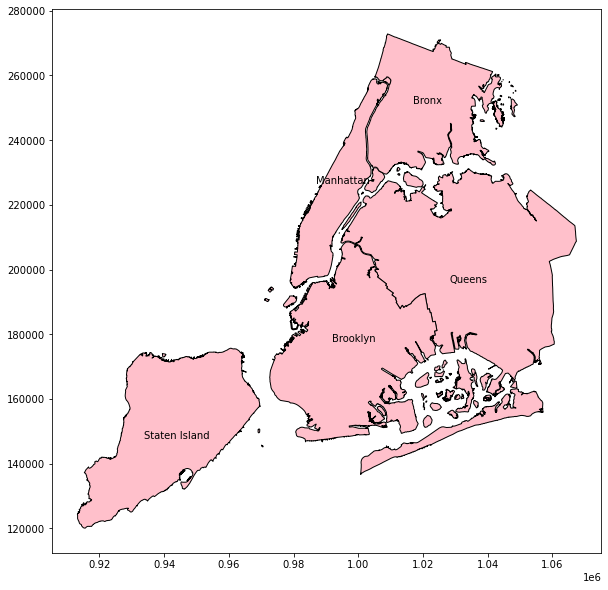

In [9]:
#Plot Boros with labels. 
boros['coords'] = boros['geometry'].apply(lambda x: x.representative_point().coords[:])
boros['coords'] = [coords[0] for coords in boros['coords']]
fig, ax = plt.subplots(figsize = (10,10))
boros.plot(ax=ax, color='pink', edgecolor='black')
for idx, row in boros.iterrows():
    plt.annotate(row['BoroName'], xy=row['coords'], horizontalalignment='center', color='black')

In [10]:
#Plot in a more map like format
boros.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

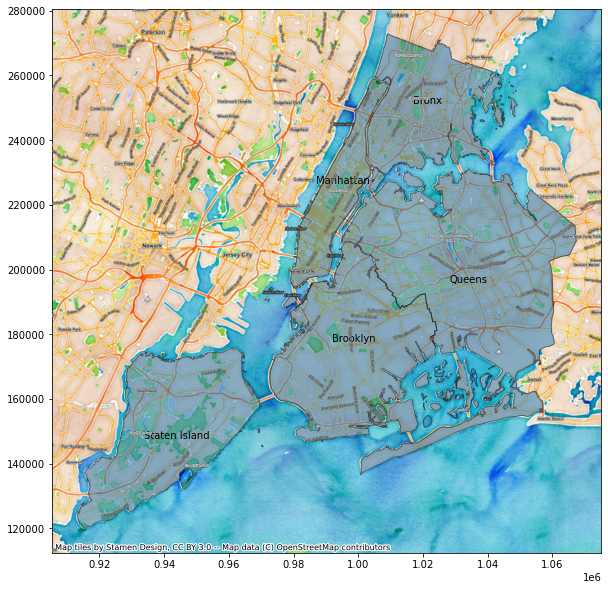

In [11]:

ax = boros.plot(figsize=(10, 10), alpha=0.5, edgecolor='black')
cx.add_basemap(ax, crs = boros.crs , source=cx.providers.Stamen.Watercolor, zoom=12)
cx.add_basemap(ax, criis = boros.crs , source=cx.providers.Stamen.TonerLabels, zoom=12)

for idx, row in boros.iterrows():
    plt.annotate(row['BoroName'], xy=row['coords'], horizontalalignment='center', color='Black')

In [12]:
print('There are {} uniques categories.'.format(len(foursquare['categories'].unique())))

There are 149 uniques categories.


In [18]:
# encode venue categories
category_onehot = pd.get_dummies(foursquare[['categories']], prefix="", prefix_sep="")

In [19]:
#Append the dummy variables to the original dataframe.
foursquare2 = pd.concat([foursquare, category_onehot], axis=1)

In [20]:
foursquare2.shape

(5173, 158)

In [21]:
#Drop the Borough, Venue, and Venue_Category , and coordinate columns. Only keep the neighborhood and
#categories columns which were assigned as dummy variables. 
nyc_foursquare = foursquare2.drop(columns = ['borough', 'fsq_id', 'categories'], axis =1)

In [22]:
nyc_foursquare.shape
nyc_foursquare.head()

,popularity,price,rating,neighborhood,photos,nbr_ratings,tips,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
0,0.993380,1.0,8.7,Wakefield,15,22,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.998275,1.0,8.6,Williamsbridge,28,161,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.982074,1.0,8.5,Edenwald,6,22,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.928070,1.0,8.1,Williamsbridge,4,34,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.951257,2.0,7.9,Williamsbridge,10,27,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Lets group the data by neighborhood. 

foursquare_grouped = nyc_foursquare.groupby('neighborhood').mean().reset_index()

In [24]:
#Take a look at the resulting data
foursquare_grouped.head(6)

,neighborhood,popularity,price,photos,nbr_ratings,tips,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,American Restaurant,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
0,Allerton,0.880336,1.307692,30.076923,36.192308,8.192308,0.0,0.0,0.0,0.115385,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,Annadale,0.958832,1.571429,13.285714,20.428571,7.142857,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,Arlington,0.981729,1.666667,16.000000,24.666667,9.666667,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
3,Arrochar,0.644613,1.666667,7.000000,11.000000,3.333333,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,Arverne,0.932360,1.000000,21.750000,28.250000,5.250000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
5,Astoria,0.944310,1.660377,275.660377,318.650943,75.141509,0.0,0.0,0.0,0.000000,...,0.018868,0.0,0.0,0.0,0.0,0.0,0.04717,0.0,0.0,0.0


In [25]:
merged_apis = foursquare_grouped

In [26]:
#Take a look at the shape of the grouped data
#Note that the number of columns are the same but the rows obviously decreased. 
foursquare_grouped.shape

(276, 154)

In [27]:
#Drop the Neighborhood Column so taht we only have numerical values
modeling_data = foursquare_grouped.drop(['neighborhood'], axis =   1)

In [30]:
modeling_data.to_excel("prescale1.xlsx")

In [32]:
#Standardize my data
features = modeling_data.keys()
features

Index(['popularity', 'price', 'photos', 'nbr_ratings', 'tips',
       'Afghan Restaurant', 'African Restaurant',
       'Agriculture and Forestry Service', 'American Restaurant',
       'Amusement Park',
       ...
       'Thai Restaurant', 'Tobacco Store', 'Turkish Restaurant',
       'Used Bookstore', 'Vegan and Vegetarian Restaurant',
       'Vietnamese Restaurant', 'Wine Bar', 'Wine Store', 'Wings Joint',
       'Yoga Studio'],
      dtype='object', length=153)

In [33]:
#scale data using standard scaler
scaler = StandardScaler()
scaled_final_data = scaler.fit_transform(modeling_data)
scaled_final_data = pd.DataFrame(scaled_final_data ,  columns = features)
scaled_final_data
scaled_final_data.to_excel("scaled1.xlsx")

In [34]:
scaled_final_data2 = scaled_final_data[['popularity', 'price', 'photos', 'nbr_ratings', 'tips']]
scaled_final_data2.to_excel("scaled2.xlsx")

In [35]:
scaled_final_data

,popularity,price,photos,nbr_ratings,tips,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,American Restaurant,Amusement Park,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
0,-1.291537,-0.652565,-0.150257,-0.251335,-0.341848,-0.084265,-0.125284,-0.060302,0.516271,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
1,0.336060,-0.068852,-0.158970,-0.273746,-0.353295,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
2,0.810824,0.141934,-0.157561,-0.267721,-0.325766,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
3,-6.179212,0.141934,-0.162231,-0.287150,-0.394846,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
4,-0.212833,-1.333564,-0.154578,-0.262626,-0.373941,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,-4.653548,-0.005616,-0.154033,-0.230283,-0.319949,-0.084265,-0.125284,-0.060302,1.193537,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
272,-0.535356,-0.567440,-0.157282,-0.269762,-0.361145,-0.084265,-0.125284,-0.060302,-0.099426,-0.060302,...,1.148160,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
273,0.877409,-1.333564,-0.155486,-0.285729,-0.398482,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
274,0.084857,-0.226941,-0.160804,-0.271156,-0.384848,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302


In [36]:
scaled_final_data.dtypes

popularity               float64
price                    float64
photos                   float64
nbr_ratings              float64
tips                     float64
                          ...   
Vietnamese Restaurant    float64
Wine Bar                 float64
Wine Store               float64
Wings Joint              float64
Yoga Studio              float64
Length: 153, dtype: object

In [37]:
#Define a function that will draw the elbow plot
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
    
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.plot(range(1,max_clusters +1), distortions, marker='o', linewidth = 2, color = 'magenta')
    plt.title('Elbow Plot - KMeans')
    plt.xlabel('Number of clusters')
    plt.xticks(np.arange(1,11,1))
    plt.ylabel('Distortion')
    plt.show() 

In [38]:
#Call the functions that yields the optimal number of clusters for kmeans using the dataframe with all features
#We will use the minimum required which is 3 clusters even though the sharp turn occurs on the second cluster
#plot_distortion(scaled_final_data)

In [39]:
#Indeed we will choose 5 clusters to model the data. 
# run k-means clustering
kclusters = 5
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scaled_final_data2)
kmeans.labels_


array([3, 0, 0, 3, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 3, 3, 4, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 4, 0, 0, 1, 4, 4, 0,
       0, 4, 0, 0, 4, 4, 4, 3, 4, 0, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 0, 4,
       4, 0, 4, 4, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0,
       4, 0, 4, 0, 0, 3, 0, 4, 0, 0, 0, 0, 3, 4, 0, 0, 3, 4, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 4, 0, 3, 0, 0, 2, 0, 0, 3, 4, 0, 0, 3, 4, 3, 0,
       4, 0, 0, 0, 0, 3, 0, 0, 0, 4, 4, 0, 3, 0, 0, 4, 0, 0, 0, 4, 3, 4,
       0, 0, 0, 4, 1, 0, 4, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0,
       3, 0, 0, 4, 0, 0, 4, 0, 0, 4, 3, 4, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 4, 4, 0, 4, 3, 0, 4, 4, 0, 3, 4, 4, 0, 0, 0, 0,
       3, 4, 0, 0, 4, 3, 4, 0, 0, 3, 0, 0, 0, 0, 0, 4, 4, 0, 4, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 4, 1, 4, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0])

In [40]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4])

In [41]:
#Check the cluster labels to make sure we only have 5

In [42]:
#Now lets create a new dataframe where we include all the information in addition to the cluster label 
# add clustering labels
#!!! warning - Do not run this cell multiple times and if you do, please re run the cells since the API was called.
foursquare_clustered = foursquare_grouped.copy()
foursquare_clustered.insert(0, 'Cluster Labels', kmeans.labels_)

In [43]:
foursquare_clustered

,Cluster Labels,neighborhood,popularity,price,photos,nbr_ratings,tips,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
0,3,Allerton,0.880336,1.307692,30.076923,36.192308,8.192308,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Annadale,0.958832,1.571429,13.285714,20.428571,7.142857,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Arlington,0.981729,1.666667,16.000000,24.666667,9.666667,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Arrochar,0.644613,1.666667,7.000000,11.000000,3.333333,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Arverne,0.932360,1.000000,21.750000,28.250000,5.250000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,3,Wingate,0.718193,1.600000,22.800000,51.000000,10.200000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,0,Woodhaven,0.916805,1.346154,16.538462,23.230769,6.423077,0.0,0.0,0.0,...,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,0,Woodlawn,0.984940,1.000000,20.000000,12.000000,3.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0,Woodrow,0.946717,1.500000,9.750000,22.250000,4.250000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
foursquare_clustered.rename(columns = {'neighborhood' : 'Neighborhood'})

,Cluster Labels,Neighborhood,popularity,price,photos,nbr_ratings,tips,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
0,3,Allerton,0.880336,1.307692,30.076923,36.192308,8.192308,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Annadale,0.958832,1.571429,13.285714,20.428571,7.142857,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Arlington,0.981729,1.666667,16.000000,24.666667,9.666667,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Arrochar,0.644613,1.666667,7.000000,11.000000,3.333333,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Arverne,0.932360,1.000000,21.750000,28.250000,5.250000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,3,Wingate,0.718193,1.600000,22.800000,51.000000,10.200000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,0,Woodhaven,0.916805,1.346154,16.538462,23.230769,6.423077,0.0,0.0,0.0,...,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,0,Woodlawn,0.984940,1.000000,20.000000,12.000000,3.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0,Woodrow,0.946717,1.500000,9.750000,22.250000,4.250000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
foursquare_clustered.columns

Index(['Cluster Labels', 'neighborhood', 'popularity', 'price', 'photos',
       'nbr_ratings', 'tips', 'Afghan Restaurant', 'African Restaurant',
       'Agriculture and Forestry Service',
       ...
       'Thai Restaurant', 'Tobacco Store', 'Turkish Restaurant',
       'Used Bookstore', 'Vegan and Vegetarian Restaurant',
       'Vietnamese Restaurant', 'Wine Bar', 'Wine Store', 'Wings Joint',
       'Yoga Studio'],
      dtype='object', length=155)

In [46]:
# merge venues sorted dataframe with original nyc dataframe to add latitude/longitude for each neighborhood

neighborhoods_merged = nyc_geo

neighborhoods_merged = neighborhoods_merged.join(foursquare_clustered.set_index('neighborhood'), on='Neighborhood')

neighborhoods_merged # check the last columns!

,Unnamed: 0,Neighborhood,Borough,lat,long,Cluster Labels,popularity,price,photos,nbr_ratings,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
0,0,Wakefield,Bronx,40.8947,-73.8472,0.0,0.944593,1.375000,9.625000,13.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Co-op City,Bronx,40.8743,-73.8299,0.0,0.973455,1.421053,46.947368,59.684211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Eastchester,Bronx,40.8876,-73.8278,4.0,0.969823,2.000000,148.833333,209.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Fieldston,Bronx,40.8954,-73.9056,0.0,0.932886,1.685714,21.742857,38.971429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Riverdale,Bronx,40.8908,-73.9126,4.0,0.979066,2.500000,3.666667,31.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,301,Hudson Yards,Manhattan,40.7567,-74.0001,3.0,0.872593,2.200000,54.800000,85.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0
302,302,Hammels,Queens,40.5873,-73.8055,0.0,0.942361,1.375000,157.000000,135.791667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,303,Bayswater,Queens,40.6113,-73.7660,3.0,0.898516,2.000000,10.000000,20.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,304,Queensbridge,Queens,40.7561,-73.9456,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
neighborhoods_merged['Neighborhood']

0         Wakefield
1        Co-op City
2       Eastchester
3         Fieldston
4         Riverdale
           ...     
301    Hudson Yards
302         Hammels
303       Bayswater
304    Queensbridge
305       Fox Hills
Name: Neighborhood, Length: 306, dtype: object

In [48]:
#several neighborhoods missing some data
neighborhoods_merged[neighborhoods_merged['Cluster Labels'].isnull()].head()

,Unnamed: 0,Neighborhood,Borough,lat,long,Cluster Labels,popularity,price,photos,nbr_ratings,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
11,11,Pelham Parkway,Bronx,40.8574,-73.8548,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,19,High Bridge,Bronx,40.8366,-73.9261,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,24,Hunts Point,Bronx,40.8097,-73.8833,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,82,Gerritsen Beach,Brooklyn,40.5908,-73.9301,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,88,Prospect Lefferts Gardens,Brooklyn,40.6584,-73.9549,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:

neighborhoods_mergedV2 = neighborhoods_merged.dropna()

In [50]:
neighborhoods_mergedV2.isnull().sum()


Unnamed: 0               0
Neighborhood             0
Borough                  0
lat                      0
long                     0
                        ..
Vietnamese Restaurant    0
Wine Bar                 0
Wine Store               0
Wings Joint              0
Yoga Studio              0
Length: 159, dtype: int64

In [51]:
cluster0 = neighborhoods_mergedV2.loc[neighborhoods_mergedV2['Cluster Labels'] == 0, neighborhoods_mergedV2.columns[[0] + list(range(5, neighborhoods_mergedV2.shape[1]))]].copy()
del cluster0['Unnamed: 0']
#Drop all columns that contain zero, meaning that the neighborhood doesnt have that category. 
cluster0.loc[:,(cluster0 != 0).any(axis=0)]

,popularity,price,photos,nbr_ratings,tips,Afghan Restaurant,African Restaurant,American Restaurant,Amusement Park,Arcade,...,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Tobacco Store,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,0.944593,1.375000,9.625000,13.000000,4.125000,0.0,0.0,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.973455,1.421053,46.947368,59.684211,13.736842,0.0,0.0,0.105263,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.932886,1.685714,21.742857,38.971429,12.371429,0.0,0.0,0.142857,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
7,0.984940,1.000000,20.000000,12.000000,3.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
8,0.918454,1.350000,12.000000,17.550000,5.050000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.922177,1.400000,6.200000,12.000000,3.600000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
293,0.969239,1.480000,14.000000,37.880000,56.080000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0
299,0.939812,1.000000,3.000000,9.000000,5.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
302,0.942361,1.375000,157.000000,135.791667,28.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [52]:
cluster1 = neighborhoods_mergedV2.loc[neighborhoods_mergedV2['Cluster Labels'] == 1, neighborhoods_mergedV2.columns[[0] + list(range(5, neighborhoods_mergedV2.shape[1]))]].copy()
del cluster1['Unnamed: 0']
#Drop all columns that contain zero, meaning that the neighborhood doesnt have that category. 
cluster1.loc[:,(cluster0 != 1).any(axis=0)]

,Cluster Labels,popularity,price,photos,nbr_ratings,tips,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,American Restaurant,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
111,1.0,0.993748,1.909091,3809.818182,3408.000000,456.272727,0.0,0.0,0.0,0.454545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0
114,1.0,0.992166,3.105263,4662.526316,3343.736842,430.210526,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
120,1.0,0.998116,2.700000,4559.000000,2041.700000,277.133333,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
247,1.0,0.989567,1.575000,6884.475000,5204.225000,648.050000,0.0,0.0,0.0,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.075000,0.0,0.0,0.0


In [53]:
cluster2 = neighborhoods_mergedV2.loc[neighborhoods_mergedV2['Cluster Labels'] == 2, neighborhoods_mergedV2.columns[[0] + list(range(5, neighborhoods_mergedV2.shape[1]))]].copy()
del cluster2['Unnamed: 0']
#Drop all columns that contain zero, meaning that the neighborhood doesnt have that category. 
cluster2.loc[:,(cluster2 != 0).any(axis=0)]

,Cluster Labels,popularity,price,photos,nbr_ratings,tips,Stadium
42,2.0,0.999723,3.0,19092.0,5608.0,655.0,1.0


In [54]:
cluster3 = neighborhoods_mergedV2.loc[neighborhoods_mergedV2['Cluster Labels'] == 3, neighborhoods_mergedV2.columns[[0] + list(range(5, neighborhoods_mergedV2.shape[1]))]].copy()
del cluster3['Unnamed: 0']
#Drop all columns that contain zero, meaning that the neighborhood doesnt have that category. 
cluster3.loc[:,(cluster3 != 0).any(axis=0)].head()

,Cluster Labels,popularity,price,photos,nbr_ratings,tips,African Restaurant,American Restaurant,Arts and Entertainment,Asian Restaurant,...,Seafood Restaurant,Spanish Restaurant,Speakeasy,Sports Bar,Steakhouse,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
5,3.0,0.874331,1.500000,66.062500,62.1625,18.100000,0.0,0.062500,0.0,0.025000,...,0.0,0.0,0.000,0.0125,0.000,0.0125,0.0125,0.0,0.025,0.0125
6,3.0,0.883467,1.500000,18.625000,39.6250,15.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000,0.0000,0.000,0.0000,0.2500,0.0,0.125,0.0000
13,3.0,0.874941,1.750000,2488.500000,1316.2500,149.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.0000
21,3.0,0.864581,1.675000,22.900000,31.2500,10.000000,0.0,0.025000,0.0,0.025000,...,0.0,0.0,0.025,0.0250,0.025,0.0000,0.0000,0.0,0.000,0.0000
31,3.0,0.891067,1.428571,19.785714,35.0000,10.178571,0.0,0.035714,0.0,0.071429,...,0.0,0.0,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.000,0.0000


In [55]:
cluster4 = neighborhoods_mergedV2.loc[neighborhoods_mergedV2['Cluster Labels'] == 4, neighborhoods_mergedV2.columns[[0] + list(range(5, neighborhoods_mergedV2.shape[1]))]].copy()
del cluster4['Unnamed: 0']
#Drop all columns that contain zero, meaning that the neighborhood doesnt have that category. 
cluster4.loc[:,(cluster4 != 0).any(axis=0)]

,Cluster Labels,popularity,price,photos,nbr_ratings,tips,African Restaurant,Agriculture and Forestry Service,American Restaurant,Arcade,...,Taco Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store
2,4.0,0.969823,2.000000,148.833333,209.666667,34.666667,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,4.0,0.979066,2.500000,3.666667,31.000000,2.166667,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
12,4.0,0.888988,2.285714,94.619048,99.238095,28.285714,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
29,4.0,0.936676,2.500000,128.500000,134.000000,32.000000,0.0,0.0,0.250000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
35,4.0,0.948976,1.821429,37.214286,74.392857,18.642857,0.0,0.0,0.035714,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,4.0,0.990902,2.230769,455.615385,799.076923,144.076923,0.0,0.0,0.076923,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
279,4.0,0.970161,2.333333,271.666667,664.333333,175.333333,0.0,0.0,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
287,4.0,0.968068,2.000000,3.000000,10.000000,2.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
289,4.0,0.991873,2.000000,107.000000,250.000000,59.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [56]:
#Now lets visualize the clusters

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['blue', 'black', 'darkgreen', 'purple', 'red']

from folium.plugins import FloatImage
image_file = r"C:\Users\bosma_n5t6cpq\Downloads\Legend.png"

FloatImage(image_file, bottom=0, left=86).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_mergedV2['lat'], neighborhoods_mergedV2['long'], neighborhoods_mergedV2['Neighborhood'], neighborhoods_mergedV2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        tooltip = str(lat)+ ','+str(lon) + '- Cluster ' + str(cluster) + ","  +str(poi),
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=1).add_to(map_clusters)

map_clusters

In [65]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

In [68]:
#Indeed we will choose 5 clusters to model the data. 
# run k-means clustering
kclusters = 5
# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = kclusters).fit(scaled_final_data)

In [69]:
#Now lets create a new dataframe where we include all the information in addition to the cluster label 
# add clustering labels
#!!! warning - Do not run this cell multiple times and if you do, please re run the cells since the API was called.
foursquare_hierarchical = foursquare_grouped.copy()
foursquare_hierarchical.insert(0, 'Cluster Labels', ac.labels_)

In [70]:
foursquare_hierarchical

,Cluster Labels,neighborhood,popularity,price,photos,nbr_ratings,tips,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
0,0,Allerton,0.880336,1.307692,30.076923,36.192308,8.192308,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Annadale,0.958832,1.571429,13.285714,20.428571,7.142857,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Arlington,0.981729,1.666667,16.000000,24.666667,9.666667,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Arrochar,0.644613,1.666667,7.000000,11.000000,3.333333,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Arverne,0.932360,1.000000,21.750000,28.250000,5.250000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,Wingate,0.718193,1.600000,22.800000,51.000000,10.200000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,0,Woodhaven,0.916805,1.346154,16.538462,23.230769,6.423077,0.0,0.0,0.0,...,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,0,Woodlawn,0.984940,1.000000,20.000000,12.000000,3.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0,Woodrow,0.946717,1.500000,9.750000,22.250000,4.250000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# merge venues sorted dataframe with original nyc dataframe to add latitude/longitude for each neighborhood

hierarchical_merged = nyc_geo.copy()

hierarchical_merged = hierarchical_merged.join(foursquare_hierarchical.set_index('neighborhood'), on='Neighborhood')

hierarchical_merged.tail() # check the last columns!

,Unnamed: 0,Neighborhood,Borough,lat,long,Cluster Labels,popularity,price,photos,nbr_ratings,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
301,301,Hudson Yards,Manhattan,40.7567,-74.0001,0.0,0.872593,2.200,54.800,85.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0
302,302,Hammels,Queens,40.5873,-73.8055,0.0,0.942361,1.375,157.000,135.791667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,303,Bayswater,Queens,40.6113,-73.7660,0.0,0.898516,2.000,10.000,20.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,304,Queensbridge,Queens,40.7561,-73.9456,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,305,Fox Hills,Staten Island,40.6173,-74.0817,0.0,0.974862,1.000,9.625,20.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
#There are two neighborhoods for which there is no data. I will drop them. 
hierarchical_merged[hierarchical_merged['Cluster Labels'].isnull()].head()

,Unnamed: 0,Neighborhood,Borough,lat,long,Cluster Labels,popularity,price,photos,nbr_ratings,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
11,11,Pelham Parkway,Bronx,40.8574,-73.8548,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,19,High Bridge,Bronx,40.8366,-73.9261,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,24,Hunts Point,Bronx,40.8097,-73.8833,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,82,Gerritsen Beach,Brooklyn,40.5908,-73.9301,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,88,Prospect Lefferts Gardens,Brooklyn,40.6584,-73.9549,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
hierarchical_mergedV2 = hierarchical_merged.dropna()

In [74]:

#Now lets visualize the clusters

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['red', 'blue', 'darkgreen', 'purple', 'black']


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hierarchical_mergedV2['lat'], hierarchical_mergedV2['long'], hierarchical_mergedV2['Neighborhood'], hierarchical_mergedV2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        tooltip = str(lat)+ ','+str(lon) + '- Cluster ' + str(cluster) + ","  +str(poi),
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [75]:
foursquare_grouped.head()
foursquare_simplified = foursquare_grouped[['neighborhood', 'popularity', 'price', 'photos', 'nbr_ratings', 'tips']]
foursquare_simplified.head()

,neighborhood,popularity,price,photos,nbr_ratings,tips
0,Allerton,0.880336,1.307692,30.076923,36.192308,8.192308
1,Annadale,0.958832,1.571429,13.285714,20.428571,7.142857
2,Arlington,0.981729,1.666667,16.000000,24.666667,9.666667
3,Arrochar,0.644613,1.666667,7.000000,11.000000,3.333333
4,Arverne,0.932360,1.000000,21.750000,28.250000,5.250000


In [76]:
#create dataframe
yelp_grouped = pd.read_csv("yelp_grouped_data.csv")

yelp_grouped.head()

,Unnamed: 0,Neighborhood,Venue_Rating,Review_Count,Acai Bowls,Accessories,Accountants,Acupuncture,Afghan,African,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
0,0,Allerton,3.975,30.20,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Annadale,4.000,49.55,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Arden Heights,3.750,13.85,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Arlington,4.000,11.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Arrochar,4.375,36.50,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# merge venues sorted dataframe with original nyc dataframe to add latitude/longitude for each neighborhood

api_merged = foursquare_simplified.copy()

api_merged = api_merged.join(yelp_grouped.set_index('Neighborhood'), on='neighborhood')

del api_merged['Unnamed: 0']
api_merged # check the last columns!

,neighborhood,popularity,price,photos,nbr_ratings,tips,Venue_Rating,Review_Count,Acai Bowls,Accessories,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
0,Allerton,0.880336,1.307692,30.076923,36.192308,8.192308,3.975,30.20,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.958832,1.571429,13.285714,20.428571,7.142857,4.000,49.55,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arlington,0.981729,1.666667,16.000000,24.666667,9.666667,4.000,11.00,0.0,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arrochar,0.644613,1.666667,7.000000,11.000000,3.333333,4.375,36.50,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arverne,0.932360,1.000000,21.750000,28.250000,5.250000,4.550,50.50,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Wingate,0.718193,1.600000,22.800000,51.000000,10.200000,4.050,36.80,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,Woodhaven,0.916805,1.346154,16.538462,23.230769,6.423077,4.900,415.35,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,Woodlawn,0.984940,1.000000,20.000000,12.000000,3.000000,4.400,36.85,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,Woodrow,0.946717,1.500000,9.750000,22.250000,4.250000,3.825,34.90,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
#Drop the Neighborhood Column so taht we only have numerical values
modeling_merged = api_merged.drop(['neighborhood'], axis =   1)
modeling_merged.head()

,popularity,price,photos,nbr_ratings,tips,Venue_Rating,Review_Count,Acai Bowls,Accessories,Accountants,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
0,0.880336,1.307692,30.076923,36.192308,8.192308,3.975,30.20,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.958832,1.571429,13.285714,20.428571,7.142857,4.000,49.55,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.981729,1.666667,16.000000,24.666667,9.666667,4.000,11.00,0.0,0.0,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.644613,1.666667,7.000000,11.000000,3.333333,4.375,36.50,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.932360,1.000000,21.750000,28.250000,5.250000,4.550,50.50,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
#Standardize my data
features = modeling_data.keys()
features

Index(['popularity', 'price', 'photos', 'nbr_ratings', 'tips',
       'Afghan Restaurant', 'African Restaurant',
       'Agriculture and Forestry Service', 'American Restaurant',
       'Amusement Park',
       ...
       'Thai Restaurant', 'Tobacco Store', 'Turkish Restaurant',
       'Used Bookstore', 'Vegan and Vegetarian Restaurant',
       'Vietnamese Restaurant', 'Wine Bar', 'Wine Store', 'Wings Joint',
       'Yoga Studio'],
      dtype='object', length=153)

In [80]:
#scale data using standard scaler
scaler = StandardScaler()
merged_scaled = scaler.fit_transform(modeling_data)
merged_scaled = pd.DataFrame(merged_scaled,  columns = features)
merged_scaled

,popularity,price,photos,nbr_ratings,tips,Afghan Restaurant,African Restaurant,Agriculture and Forestry Service,American Restaurant,Amusement Park,...,Thai Restaurant,Tobacco Store,Turkish Restaurant,Used Bookstore,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Wine Bar,Wine Store,Wings Joint,Yoga Studio
0,-1.291537,-0.652565,-0.150257,-0.251335,-0.341848,-0.084265,-0.125284,-0.060302,0.516271,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
1,0.336060,-0.068852,-0.158970,-0.273746,-0.353295,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
2,0.810824,0.141934,-0.157561,-0.267721,-0.325766,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
3,-6.179212,0.141934,-0.162231,-0.287150,-0.394846,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
4,-0.212833,-1.333564,-0.154578,-0.262626,-0.373941,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,-4.653548,-0.005616,-0.154033,-0.230283,-0.319949,-0.084265,-0.125284,-0.060302,1.193537,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
272,-0.535356,-0.567440,-0.157282,-0.269762,-0.361145,-0.084265,-0.125284,-0.060302,-0.099426,-0.060302,...,1.148160,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
273,0.877409,-1.333564,-0.155486,-0.285729,-0.398482,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302
274,0.084857,-0.226941,-0.160804,-0.271156,-0.384848,-0.084265,-0.125284,-0.060302,-0.407275,-0.060302,...,-0.229940,-0.060302,-0.060302,-0.060302,-0.093503,-0.113618,-0.265517,-0.060302,-0.074689,-0.060302


In [81]:
merged_scaled.to_excel("merged_scaled.xlsx")

In [82]:
kclusters = 6
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(merged_scaled)

In [83]:
kmeans.labels_

array([0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 2, 4, 0, 5, 0, 4, 0, 0, 0, 4,
       4, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 4, 1, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 0, 0, 4, 4,
       4, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0,
       0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 4, 4, 4, 4, 0, 0, 4, 4,
       0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 4, 4,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4,
       0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 4, 0])

In [84]:
#Now lets create a new dataframe where we include all the information in addition to the cluster label 
# add clustering labels
#!!! warning - Do not run this cell multiple times and if you do, please re run the cells since the API was called.
kmeans_api = api_merged.copy()
kmeans_api.insert(0, 'Cluster Labels', kmeans.labels_)
kmeans_api.head()

,Cluster Labels,neighborhood,popularity,price,photos,nbr_ratings,tips,Venue_Rating,Review_Count,Acai Bowls,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
0,0,Allerton,0.880336,1.307692,30.076923,36.192308,8.192308,3.975,30.20,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,Annadale,0.958832,1.571429,13.285714,20.428571,7.142857,4.000,49.55,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Arlington,0.981729,1.666667,16.000000,24.666667,9.666667,4.000,11.00,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Arrochar,0.644613,1.666667,7.000000,11.000000,3.333333,4.375,36.50,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Arverne,0.932360,1.000000,21.750000,28.250000,5.250000,4.550,50.50,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# merge venues sorted dataframe with original nyc dataframe to add latitude/longitude for each neighborhood

kmeans_nyc = nyc_geo

kmeans_nyc = kmeans_nyc.join(kmeans_api.set_index('neighborhood'), on='Neighborhood')

del kmeans_nyc['Unnamed: 0']

kmeans_nyc.head() # check the last columns!

,Neighborhood,Borough,lat,long,Cluster Labels,popularity,price,photos,nbr_ratings,tips,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
0,Wakefield,Bronx,40.8947,-73.8472,4.0,0.944593,1.375000,9.625000,13.000000,4.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Co-op City,Bronx,40.8743,-73.8299,0.0,0.973455,1.421053,46.947368,59.684211,13.736842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Eastchester,Bronx,40.8876,-73.8278,0.0,0.969823,2.000000,148.833333,209.666667,34.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fieldston,Bronx,40.8954,-73.9056,0.0,0.932886,1.685714,21.742857,38.971429,12.371429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Riverdale,Bronx,40.8908,-73.9126,0.0,0.979066,2.500000,3.666667,31.000000,2.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
#no neighbourhoods that are null
kmeans_nyc[kmeans_nyc['Cluster Labels'].isnull()].head()

,Neighborhood,Borough,lat,long,Cluster Labels,popularity,price,photos,nbr_ratings,tips,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
11,Pelham Parkway,Bronx,40.8574,-73.8548,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,High Bridge,Bronx,40.8366,-73.9261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Hunts Point,Bronx,40.8097,-73.8833,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Gerritsen Beach,Brooklyn,40.5908,-73.9301,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Prospect Lefferts Gardens,Brooklyn,40.6584,-73.9549,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
kmeans_final = kmeans_nyc.dropna()

In [88]:
kmeans_final.isnull().sum()

Neighborhood        0
Borough             0
lat                 0
long                0
Cluster Labels      0
                   ..
Wine Bars           0
Wineries            0
Women's Clothing    0
Wraps               0
Yoga                0
Length: 588, dtype: int64

In [89]:

#Now lets visualize the clusters

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow2 = ['blue', 'blue', 'blue', 'purple', 'yellow']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kmeans_final['lat'], kmeans_final['long'], kmeans_final['Neighborhood'], kmeans_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        tooltip = str(lat)+ ','+str(lon) + '- Cluster ' + str(cluster) + ","  +str(poi),
        popup=label,
        color=rainbow2[int(cluster)-1],
        fill=True,
        fill_color=rainbow2[int(cluster)-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [90]:
#Indeed we will choose 5 clusters to model the data. 
# run k-means clustering
kclusters = 4
# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = kclusters).fit(merged_scaled)

In [91]:
#Check the cluster labels to make sure we only have 5
ac.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [92]:
#Now lets create a new dataframe where we include all the information in addition to the cluster label 
# add clustering labels
hierarchical_api = api_merged.copy()
hierarchical_api.insert(0, 'Cluster Labels', ac.labels_)


In [93]:
hierarchical_api['Cluster Labels'].unique()

array([0, 3, 2, 1], dtype=int64)

In [94]:
hierarchical_nyc = nyc_geo

hierarchical_nyc = hierarchical_nyc.join(hierarchical_api.set_index('neighborhood'), on='Neighborhood')

del hierarchical_nyc['Unnamed: 0']

hierarchical_nyc.head() # check the last columns!

,Neighborhood,Borough,lat,long,Cluster Labels,popularity,price,photos,nbr_ratings,tips,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
0,Wakefield,Bronx,40.8947,-73.8472,0.0,0.944593,1.375000,9.625000,13.000000,4.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Co-op City,Bronx,40.8743,-73.8299,0.0,0.973455,1.421053,46.947368,59.684211,13.736842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Eastchester,Bronx,40.8876,-73.8278,0.0,0.969823,2.000000,148.833333,209.666667,34.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fieldston,Bronx,40.8954,-73.9056,0.0,0.932886,1.685714,21.742857,38.971429,12.371429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Riverdale,Bronx,40.8908,-73.9126,0.0,0.979066,2.500000,3.666667,31.000000,2.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
#There are two neighborhoods for which there is no data. I will drop them. 
hierarchical_nyc[hierarchical_nyc['Cluster Labels'].isnull()].head()

,Neighborhood,Borough,lat,long,Cluster Labels,popularity,price,photos,nbr_ratings,tips,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
11,Pelham Parkway,Bronx,40.8574,-73.8548,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,High Bridge,Bronx,40.8366,-73.9261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Hunts Point,Bronx,40.8097,-73.8833,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Gerritsen Beach,Brooklyn,40.5908,-73.9301,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Prospect Lefferts Gardens,Brooklyn,40.6584,-73.9549,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
hierarchical_final = hierarchical_nyc.dropna().copy()

In [97]:
hierarchical_final.isnull().sum()

Neighborhood        0
Borough             0
lat                 0
long                0
Cluster Labels      0
                   ..
Wine Bars           0
Wineries            0
Women's Clothing    0
Wraps               0
Yoga                0
Length: 588, dtype: int64

In [98]:

#Now lets visualize the clusters

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['blue', 'red', 'purple', 'darkgreen', 'pink', 'black', 'orange']


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hierarchical_final['lat'], hierarchical_final['long'], hierarchical_final['Neighborhood'], hierarchical_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        tooltip = str(lat)+ ','+str(lon) + '- Cluster ' + str(cluster) + ","  +str(poi),
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [99]:
# import DBSCAN
from sklearn.cluster import DBSCAN

In [100]:
scaled_final_data.iloc[11]

popularity               0.927410
price                    0.141934
photos                  -0.132655
nbr_ratings             -0.200428
tips                    -0.267594
                           ...   
Vietnamese Restaurant   -0.113618
Wine Bar                -0.265517
Wine Store              -0.060302
Wings Joint             -0.074689
Yoga Studio             -0.060302
Name: 11, Length: 153, dtype: float64

In [101]:
#Indeed we will choose 5 clusters to model the data. 
# run k-means clustering
kclusters = 5
# create an object
db = DBSCAN(eps=5,
            min_samples=5,
            metric='euclidean').fit(scaled_final_data)

In [102]:
#Check the cluster labels to make sure we only have 5
len(db.labels_)

276

In [103]:
#Now lets create a new dataframe where we include all the information in addition to the cluster label 
# add clustering labels
#!!! warning - Do not run this cell multiple times and if you do, please re run the cells since the API was called.
db_api = api_merged.copy()
db_api.insert(0, 'Cluster Labels', db.labels_)
db_api

,Cluster Labels,neighborhood,popularity,price,photos,nbr_ratings,tips,Venue_Rating,Review_Count,Acai Bowls,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
0,-1,Allerton,0.880336,1.307692,30.076923,36.192308,8.192308,3.975,30.20,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Annadale,0.958832,1.571429,13.285714,20.428571,7.142857,4.000,49.55,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1,Arlington,0.981729,1.666667,16.000000,24.666667,9.666667,4.000,11.00,0.0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1,Arrochar,0.644613,1.666667,7.000000,11.000000,3.333333,4.375,36.50,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Arverne,0.932360,1.000000,21.750000,28.250000,5.250000,4.550,50.50,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,-1,Wingate,0.718193,1.600000,22.800000,51.000000,10.200000,4.050,36.80,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,0,Woodhaven,0.916805,1.346154,16.538462,23.230769,6.423077,4.900,415.35,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,0,Woodlawn,0.984940,1.000000,20.000000,12.000000,3.000000,4.400,36.85,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,-1,Woodrow,0.946717,1.500000,9.750000,22.250000,4.250000,3.825,34.90,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
db_api['Cluster Labels'].unique()

array([-1,  0], dtype=int64)

In [997]:
db_nyc = nyc_geo

db_nyc = db_nyc.join(db_api.set_index('neighborhood'), on='Neighborhood')

del db_nyc['Unnamed: 0']

db_nyc.head() # check the last columns!

,Neighborhood,Borough,lat,long,Cluster Labels,popularity,price,photos,nbr_ratings,tips,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
0,Wakefield,Bronx,40.8947,-73.8472,0.0,0.944593,1.375000,9.625000,13.000000,4.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Co-op City,Bronx,40.8743,-73.8299,-1.0,0.973455,1.421053,46.947368,59.684211,13.736842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Eastchester,Bronx,40.8876,-73.8278,-1.0,0.969823,2.000000,148.833333,209.666667,34.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fieldston,Bronx,40.8954,-73.9056,-1.0,0.932886,1.685714,21.742857,38.971429,12.371429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Riverdale,Bronx,40.8908,-73.9126,-1.0,0.979066,2.500000,3.666667,31.000000,2.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [998]:
#There are two neighborhoods for which there is no data. I will drop them. 
db_nyc[db_nyc['Cluster Labels'].isnull()].head()

,Neighborhood,Borough,lat,long,Cluster Labels,popularity,price,photos,nbr_ratings,tips,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
11,Pelham Parkway,Bronx,40.8574,-73.8548,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,High Bridge,Bronx,40.8366,-73.9261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Hunts Point,Bronx,40.8097,-73.8833,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Gerritsen Beach,Brooklyn,40.5908,-73.9301,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Prospect Lefferts Gardens,Brooklyn,40.6584,-73.9549,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [999]:
db_final = db_nyc.dropna().copy()

In [1000]:
db_final.isnull().sum()

Neighborhood        0
Borough             0
lat                 0
long                0
Cluster Labels      0
                   ..
Wine Bars           0
Wineries            0
Women's Clothing    0
Wraps               0
Yoga                0
Length: 588, dtype: int64

In [1001]:

#Now lets visualize the clusters

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))

rainbow = ['red', 'blue', 'purple', 'darkgreen']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(db_final['lat'], db_final['long'], db_final['Neighborhood'], db_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        tooltip = str(lat)+ ','+str(lon) + '- Cluster ' + str(cluster) + ","  +str(poi),
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [1056]:
cluster0.loc[:,(cluster0 != 0).any(axis=0)].mean()

popularity                          0.951380
price                               1.394634
photos                             49.522551
nbr_ratings                        63.306354
tips                               15.880074
                                     ...    
Vegan and Vegetarian Restaurant     0.000317
Vietnamese Restaurant               0.002181
Wine Bar                            0.003787
Wings Joint                         0.000290
Yoga Studio                         0.000278
Length: 121, dtype: float64

In [1063]:
cluster1.loc[:,(cluster1 != 0).any(axis=0)].mean()

Cluster Labels             1.000000
popularity                 0.993399
price                      2.322339
photos                  4978.954874
nbr_ratings             3499.415461
tips                     452.916647
American Restaurant        0.126136
Art Museum                 0.058224
Bakery                     0.016667
Bar                        0.018750
Beer Store                 0.012500
Café                       0.006250
Cocktail Bar               0.012500
Coffee Shop                0.025000
Fast Food Restaurant       0.013158
French Restaurant          0.025000
Indian Restaurant          0.012500
Italian Restaurant         0.013158
Movie Theater              0.045455
Museum                     0.126705
Music Venue                0.311404
Pizzeria                   0.031250
Restaurant                 0.090710
Sushi Restaurant           0.013158
Wine Bar                   0.041477
dtype: float64

In [1064]:
cluster2.loc[:,(cluster2 != 0).any(axis=0)].mean()

Cluster Labels        2.000000
popularity            0.999723
price                 3.000000
photos            19092.000000
nbr_ratings        5608.000000
tips                655.000000
Stadium               1.000000
dtype: float64

In [1062]:
cluster3.loc[:,(cluster3 != 0).any(axis=0)].mean()

Cluster Labels             3.000000
popularity                 0.847411
price                      1.568271
photos                   117.215308
nbr_ratings               86.667498
                            ...    
Sushi Restaurant           0.010396
Thai Restaurant            0.010547
Vietnamese Restaurant      0.000548
Wine Bar                   0.030577
Wings Joint                0.000391
Length: 79, dtype: float64

In [1066]:
cluster4.loc[:,(cluster4 != 0).any(axis=0)].mean()

Cluster Labels                       4.000000
popularity                           0.967025
price                                2.112246
photos                             209.598888
nbr_ratings                        297.346086
                                      ...    
Used Bookstore                       0.000260
Vegan and Vegetarian Restaurant      0.000575
Vietnamese Restaurant                0.001002
Wine Bar                             0.027412
Wine Store                           0.000481
Length: 117, dtype: float64

In [1142]:
#create table to check cluster means
cluster_means = api_merged.copy()
cluster_means.insert(0, 'Cluster Labels', kmeans.labels_)
cluster_means = cluster_means.groupby('Cluster Labels').mean().reset_index()


In [1146]:
cluster_means

,Cluster Labels,popularity,price,photos,nbr_ratings,tips,Venue_Rating,Review_Count,Acai Bowls,Accessories,...,Whiskey Bars,Wholesale Stores,Wigs,Window Washing,Windows Installation,Wine Bars,Wineries,Women's Clothing,Wraps,Yoga
0,0,0.951274,1.383389,48.105180,61.244214,16.114278,4.181153,166.408815,0.0,0.000342,...,0.000000,0.001027,0.000342,0.001370,0.000894,0.001199,0.000000,0.000000,0.000000,0.001712
1,1,0.993399,2.322339,4978.954874,3499.415461,452.916647,4.187500,962.737500,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000
2,2,0.984495,2.800000,21488.800000,6318.600000,784.700000,3.775000,1028.900000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.844558,1.561901,109.594080,82.515714,16.934405,4.040737,111.696652,0.0,0.003125,...,0.000000,0.001563,0.000000,0.000000,0.000000,0.000000,0.000000,0.001563,0.000000,0.000000
4,4,0.968135,2.105330,202.504722,286.506931,63.850103,4.214026,392.548666,0.0,0.000000,...,0.000806,0.000000,0.000000,0.000806,0.000806,0.005645,0.000806,0.000000,0.000806,0.003629


In [2]:
submission = neighborhoods_merged[['Neighborhood', 'Cluster Labels']]
submission

NameError: name 'neighborhoods_merged' is not defined

In [1]:
submission.to_csv("neighborhood_submission.csv")

NameError: name 'submission' is not defined